In [25]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares,UnbinnedNLL

In [6]:
def f(x):
    return 2*np.sin(.5*x + .78) + .8

In [7]:
x = [.5,2.5,4.5,6.5,8.5,10.5]

In [10]:
def gen_data(x,sigma):
    return [f(i) + np.random.normal(0,sigma) for i in x]

In [21]:
y = [f(i) for i in x]

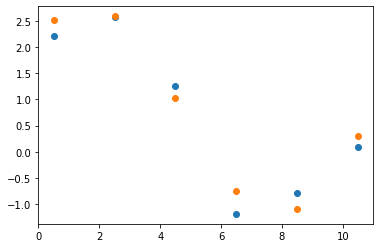

In [22]:
data = gen_data(x,0.3)
plt.scatter(x,data)
plt.scatter(x,y)

In [24]:
def func(x,p_o,p_1,p_2,p_3):
    return p_o*np.sin(p_1*x+p_2) + p_3

In [32]:
cost = UnbinnedNLL(data,func)
my_minuit = Minuit(cost, p_o=2,p_1=.5,p_2=0.78,p_3=0)
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -488.5                     │              Nfcn = 711              │
│ EDM = 9.49 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p_o  │  0.5e18   │  3.0e18   │            │            │         │         │       │
│ 1 │ p_1  │   -0.1    │    0.9    │            │            │         │         │       │
│ 2 │ p_2  │    1.1    │    2.9    │            │            │         │         │       │
│ 3 │ p_3  │  0.1e18   │  3.3e18   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │                       p_o                       p_1                       p_2                       p_3 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ p_o │                  9.16e+36  2.7062682448106629707e18   8.563081517646178753e18                    -10e36 │
│ p_1 │  2.7062682448106629707e18                     0.853                       2.5 -2.9668087841412145167e18 │
│ p_2 │   8.563081517646178753e18                       2.5                      8.18  -9.387475764400990741e18 │
│ p_3 │                    -10e36 -2.9668087841412145167e18  -9.387475764400990741e18                   1.1e+37 │
└─────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────┘